In [1]:
!pip install pandas plotly matplotlib statsmodels nbformat ipykernel scikit-learn ipywidgets sweetviz flask pydantic Flask-Pydantic pyarrow optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.1 MB/s eta 0:00:00


In [2]:
#EDA
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import sweetviz as sv

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score

#Otimização de Hiperparâmetros
import optuna


In [3]:
#Carregamento do dataset
df_obesidade = pd.read_csv('./dataset.csv')

In [4]:
df_obesidade.head(5)

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,Nivel_Atividade_Fisica,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obeso
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [5]:
#Mostrar ultimos registros do dataframe
df_obesidade.tail(5)

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,Nivel_Atividade_Fisica,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obeso
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,0,0,1,0,1
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,0,0,1,0,1
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,0,0,1,0,1
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,0,0,1,0,1
2110,0,23.664709,1,1,3.0,3.0,1,0,2.863513,0,1.026452,0.714137,1,0,0,0,1,0,1


In [6]:
#Mostrar estrutura/schema do dataframe
df_obesidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Genero_Masculino                     2111 non-null   int64  
 1   Idade                                2111 non-null   float64
 2   Historico_Familiar_Sobrepeso         2111 non-null   int64  
 3   Consumo_Alta_Caloria_Com_Frequencia  2111 non-null   int64  
 4   Consumo_Vegetais_Com_Frequencia      2111 non-null   float64
 5   Refeicoes_Dia                        2111 non-null   float64
 6   Consumo_Alimentos_entre_Refeicoes    2111 non-null   int64  
 7   Fumante                              2111 non-null   int64  
 8   Consumo_Agua                         2111 non-null   float64
 9   Monitora_Calorias_Ingeridas          2111 non-null   int64  
 10  Nivel_Atividade_Fisica               2111 non-null   float64
 11  Nivel_Uso_Tela                

In [7]:
#Conversão de variáveis para o tipo inteiro
lista_colunas = ['Idade', 'Consumo_Vegetais_Com_Frequencia', 'Refeicoes_Dia',
                 'Consumo_Agua', 'Nivel_Atividade_Fisica', 'Nivel_Uso_Tela']

df_obesidade[lista_colunas] = df_obesidade[lista_colunas].astype(int)

In [8]:
#Detectar valores ausente
df_obesidade.isna().sum()

,0
Genero_Masculino,0
Idade,0
Historico_Familiar_Sobrepeso,0
Consumo_Alta_Caloria_Com_Frequencia,0
Consumo_Vegetais_Com_Frequencia,0
Refeicoes_Dia,0
Consumo_Alimentos_entre_Refeicoes,0
Fumante,0
Consumo_Agua,0
Monitora_Calorias_Ingeridas,0


### EDA

In [9]:
#Distribuição da variável target - obeso
px.bar(df_obesidade.value_counts('Obeso'))

In [10]:
#Distribuição da variável target - obeso (porcentagem)
px.bar(df_obesidade.value_counts('Obeso') / len(df_obesidade) * 100)

In [11]:
#Analise univariada
px.histogram(df_obesidade, x='Idade')

In [12]:
#Analise univariada - Idade
px.box(df_obesidade, y='Idade')

In [13]:
#Analise univariada - genero
px.bar(df_obesidade.value_counts('Genero_Masculino') / len(df_obesidade) * 100)

In [14]:
#Analise univariada - histórico Obesidade na família
px.bar(df_obesidade.value_counts('Historico_Familiar_Sobrepeso') / len(df_obesidade) * 100)

In [15]:
#Analise univariada - nivel de exercício
px.bar(df_obesidade.value_counts('Nivel_Atividade_Fisica') / len(df_obesidade) * 100)

In [16]:
#Analise univariada - nível de uso de tela
px.bar(df_obesidade.value_counts('Nivel_Uso_Tela') / len(df_obesidade) * 100)

In [17]:
#Formulação de hipótese
#Faixa Etária influencia em obesidade
df_obesidade['Idade'].describe()

,Idade
count,2111.000000
mean,23.972525
std,6.308664
min,14.000000
25%,19.000000
50%,22.000000
75%,26.000000
max,61.000000


In [18]:
#Bucketing de Idade
bins = [10, 20, 30, 40, 50, 60, 70]
bins_ordinal = [0, 1, 2, 3, 4, 5]
labels_faixa_etaria = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70']
df_obesidade['Faixa_Etaria_String'] = pd.cut(x = df_obesidade['Idade'], bins=bins, labels=labels_faixa_etaria, include_lowest = True)
df_obesidade['Faixa_Etaria'] = pd.cut(x = df_obesidade['Idade'], bins=bins, labels=bins_ordinal, include_lowest = True)

In [19]:
df_obesidade

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,...,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obeso,Faixa_Etaria_String,Faixa_Etaria
0,0,21,1,0,2,3,1,0,2,0,...,1,0,0,0,0,1,0,0,20-30,1
1,0,21,1,0,3,3,1,1,3,1,...,0,1,0,0,0,1,0,0,20-30,1
2,1,23,1,0,2,3,1,0,2,0,...,1,2,0,0,0,1,0,0,20-30,1
3,1,27,0,0,3,3,1,0,2,0,...,0,2,0,0,0,0,1,0,20-30,1
4,1,22,0,0,2,1,1,0,2,0,...,0,1,0,0,0,1,0,0,20-30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1,1,3,3,1,0,1,0,...,0,1,0,0,0,1,0,1,10-20,0
2107,0,21,1,1,3,3,1,0,2,0,...,0,1,0,0,0,1,0,1,20-30,1
2108,0,22,1,1,3,3,1,0,2,0,...,0,1,0,0,0,1,0,1,20-30,1
2109,0,24,1,1,3,3,1,0,2,0,...,0,1,0,0,0,1,0,1,20-30,1


In [20]:
#Criação de uma tabela de Contigência - Faixa etária e obesidade
tabela_contingencia_faixa_etaria = sm.stats.Table.from_data(df_obesidade[['Obeso', 'Faixa_Etaria_String']])

In [21]:
tabela_contingencia_faixa_etaria.table_orig

Faixa_Etaria_String,10-20,20-30,30-40,40-50,50-60,60-70
Obeso,,,,,,
0,498,489,131,13,7,1
1,176,649,127,19,1,0


In [22]:
#Teste de Chi-Square de Pearson
# p_value < 0.05, rejeitamos H0, portanto, as variáveis não são independentes
print(tabela_contingencia_faixa_etaria.test_nominal_association())

df          5
pvalue      0.0
statistic   170.1116865347508


In [23]:
#Automatização do EDA
sv_obesidade_report = sv.analyze(df_obesidade, target_feat='Obeso')

                                             |          | [  0%]   00:00 -> (? left)


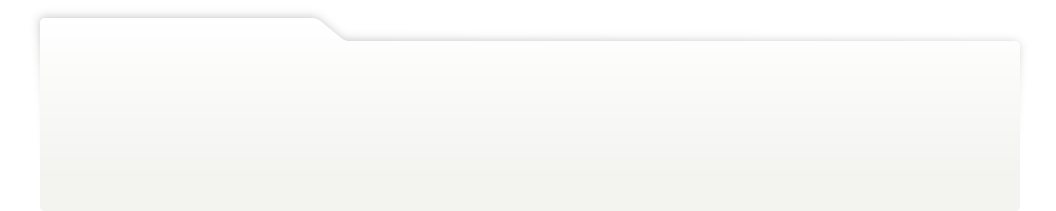
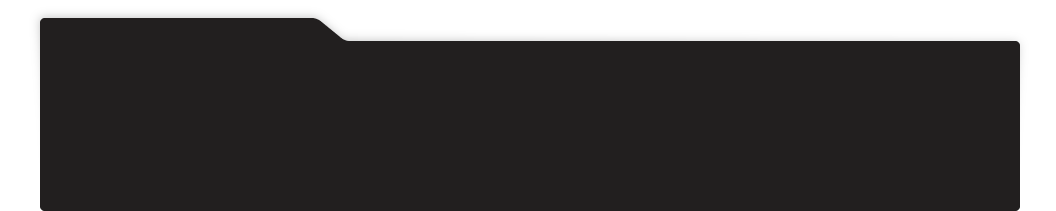
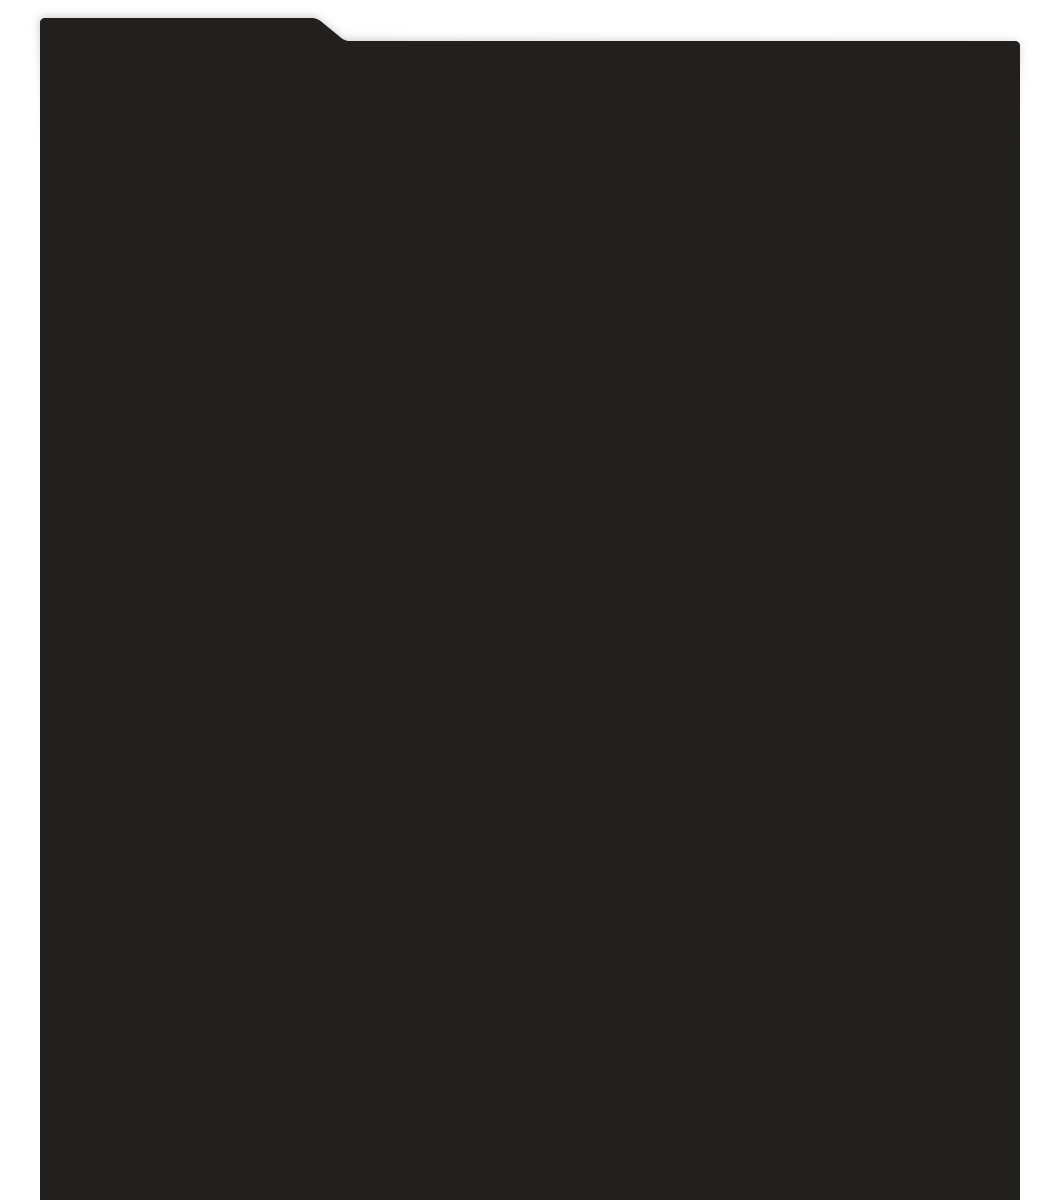
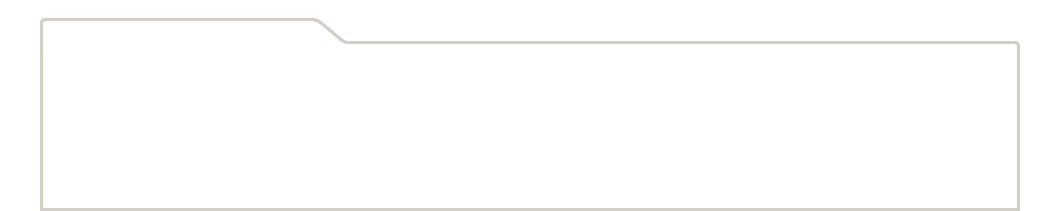
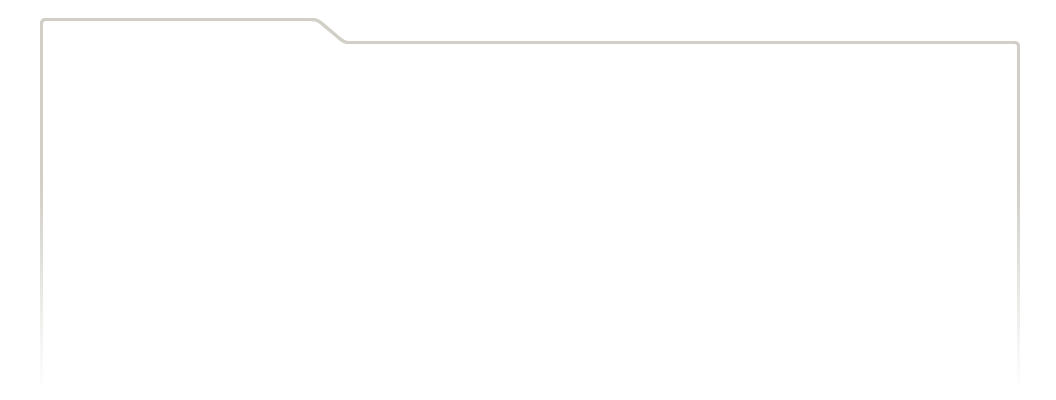
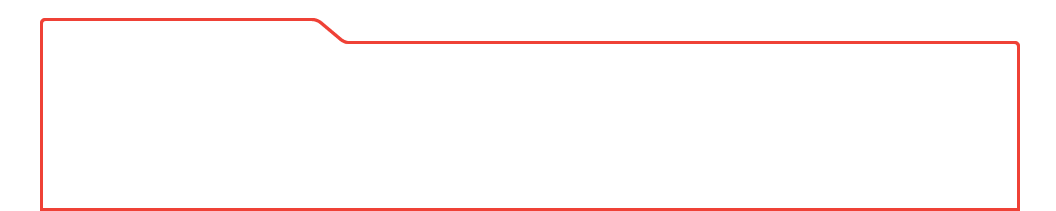
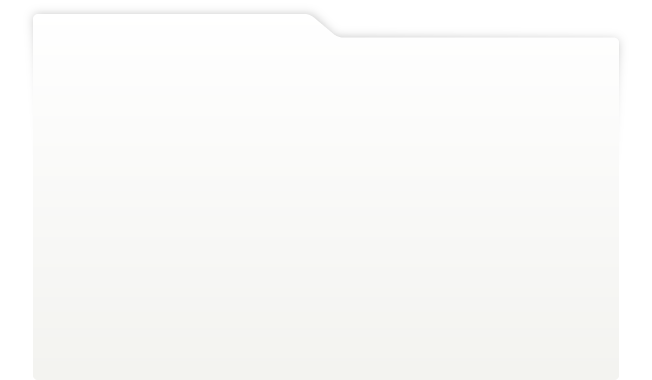
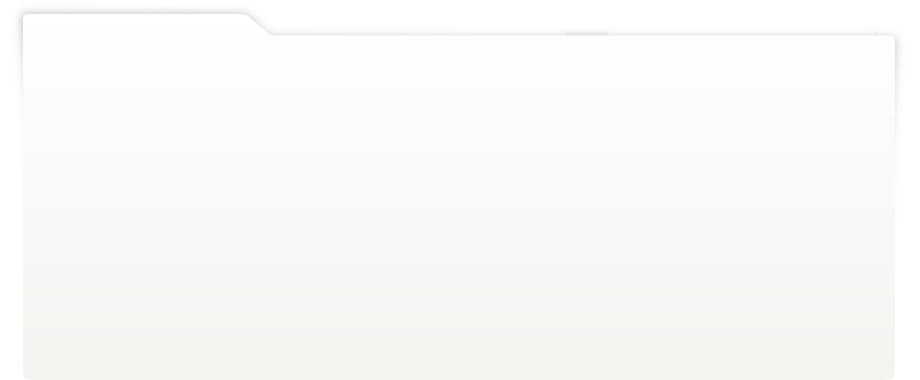
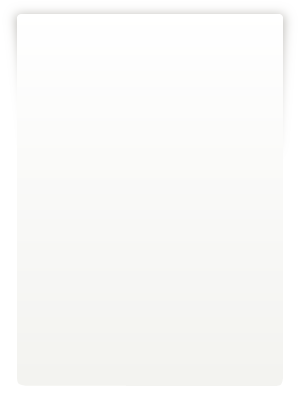
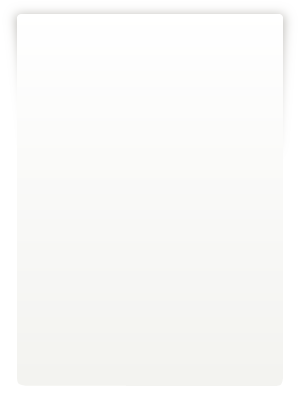
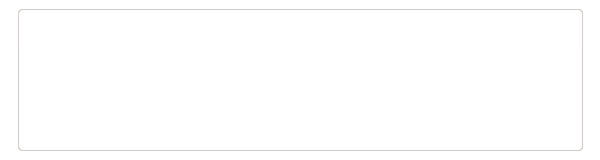
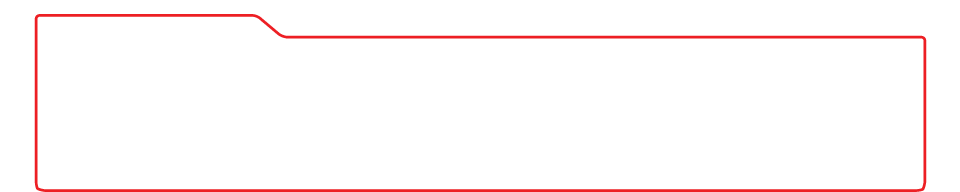
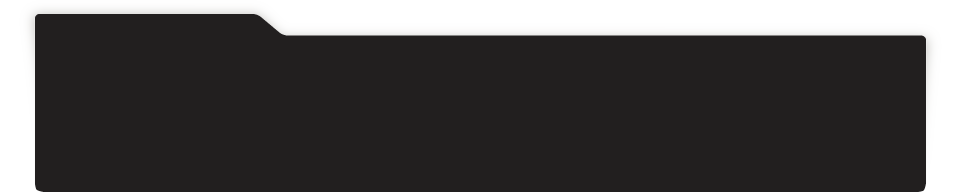
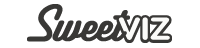
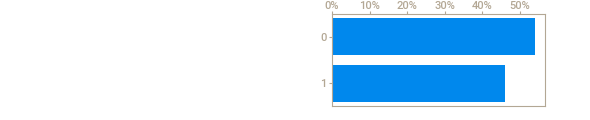
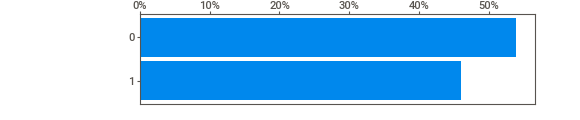
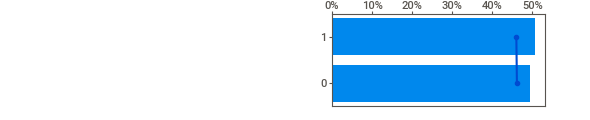
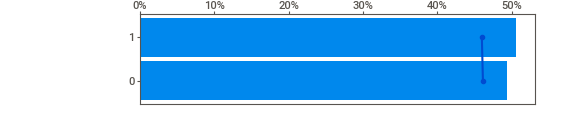
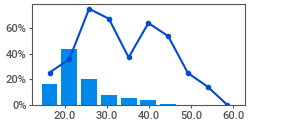
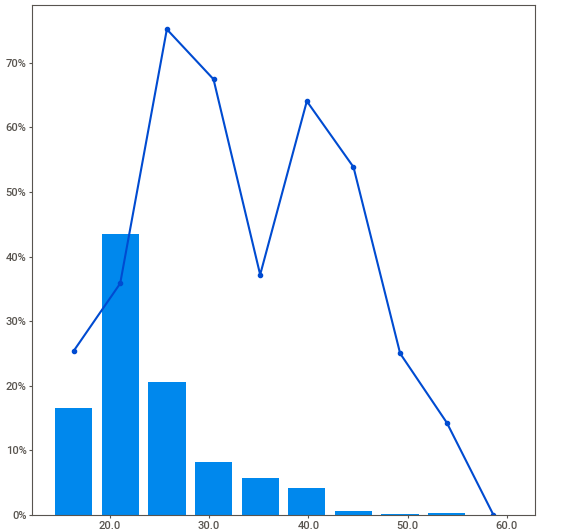
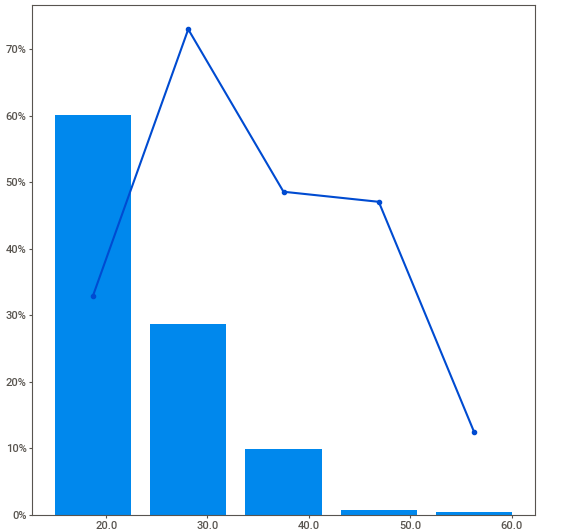
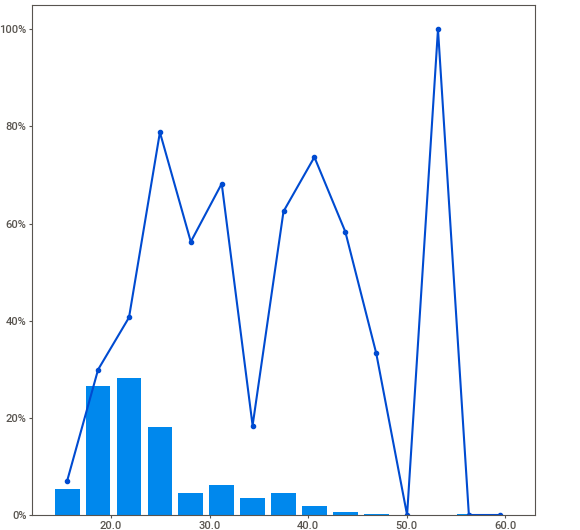
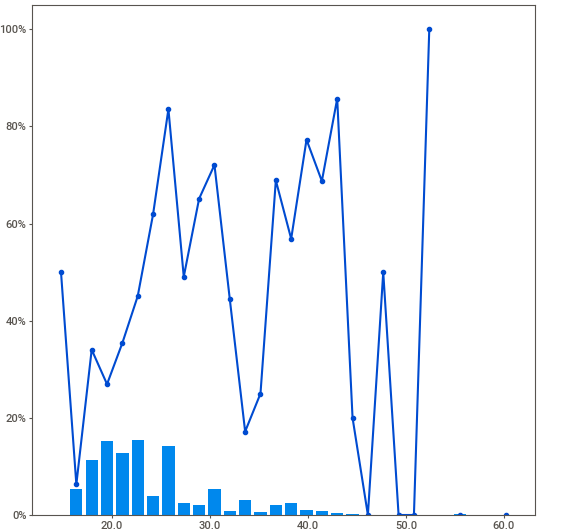
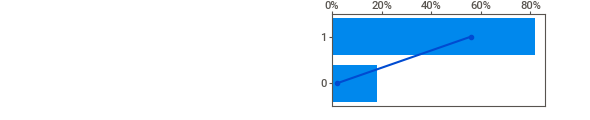
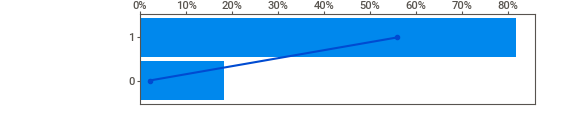
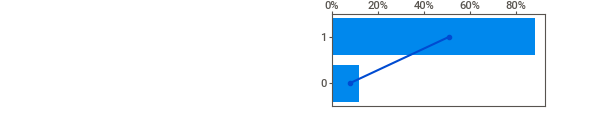
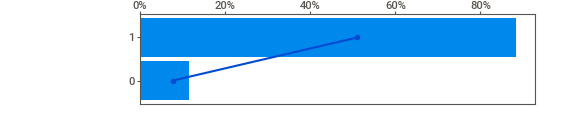
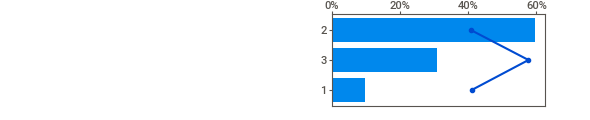
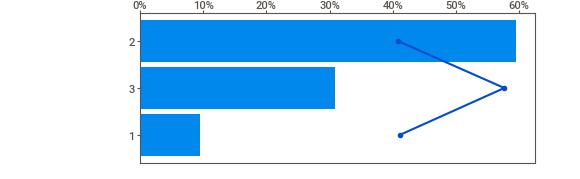
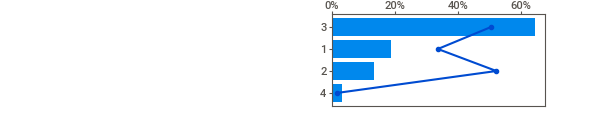
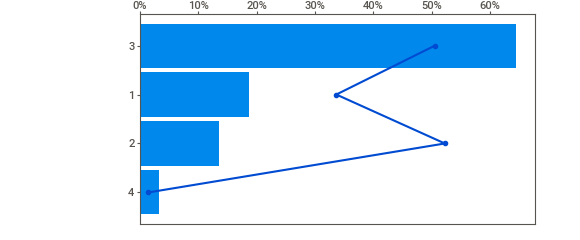
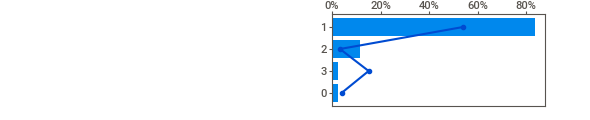
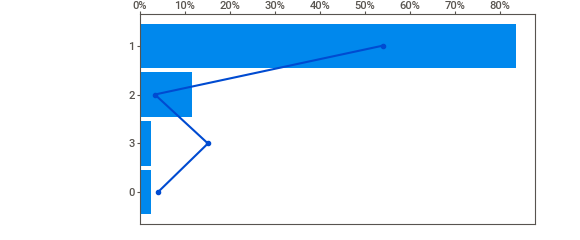
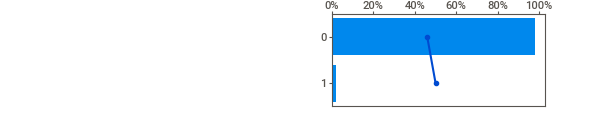
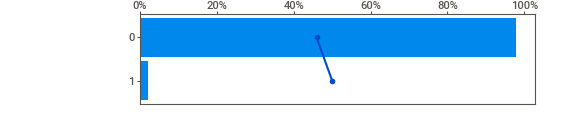
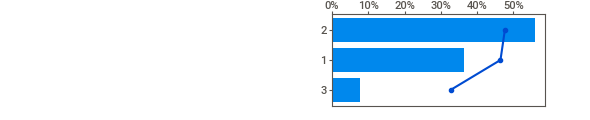
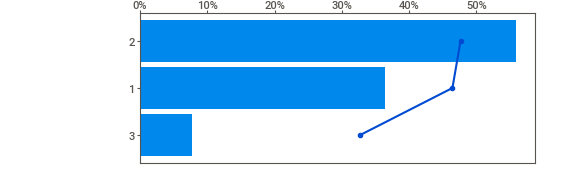
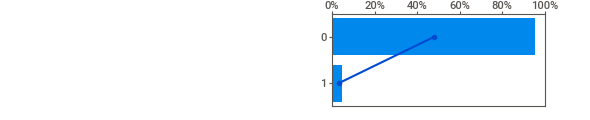
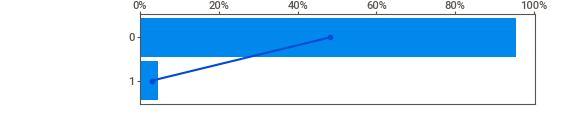
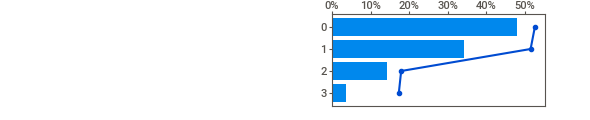
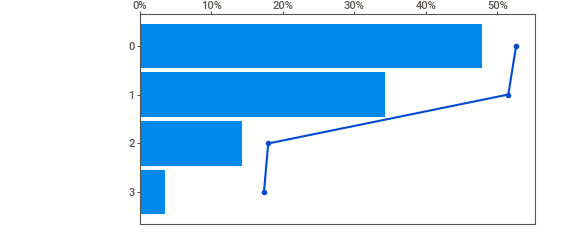
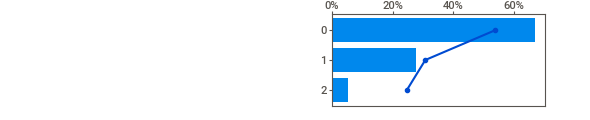
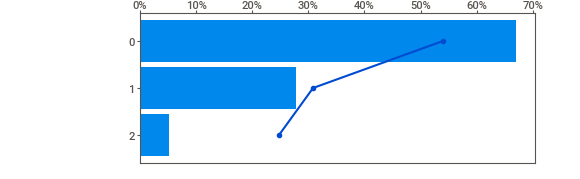
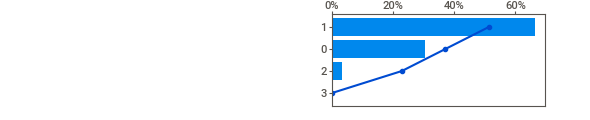
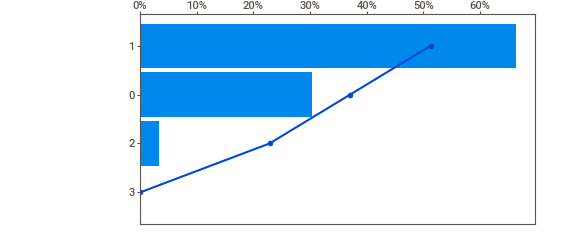
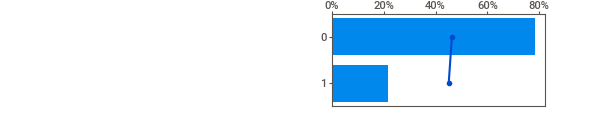
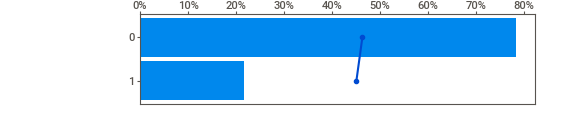
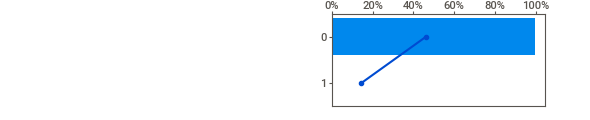
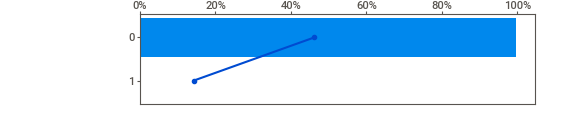
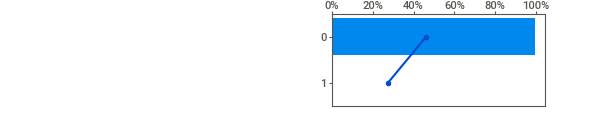
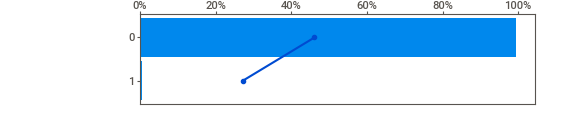
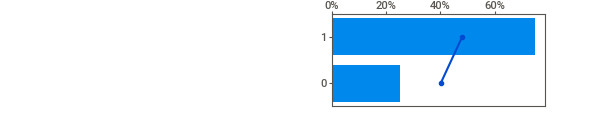
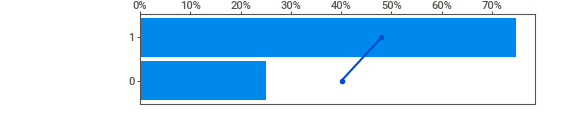
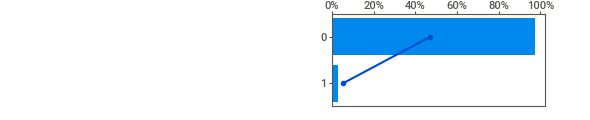
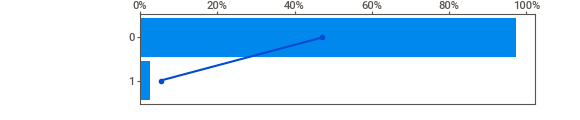
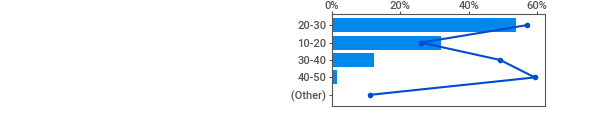
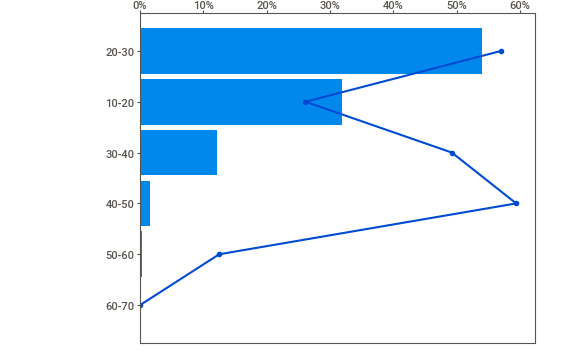
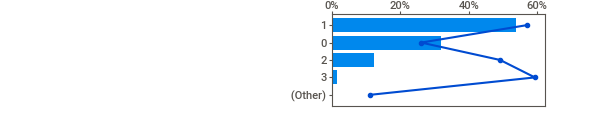
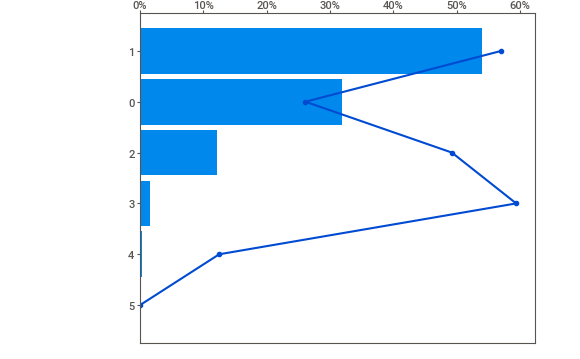
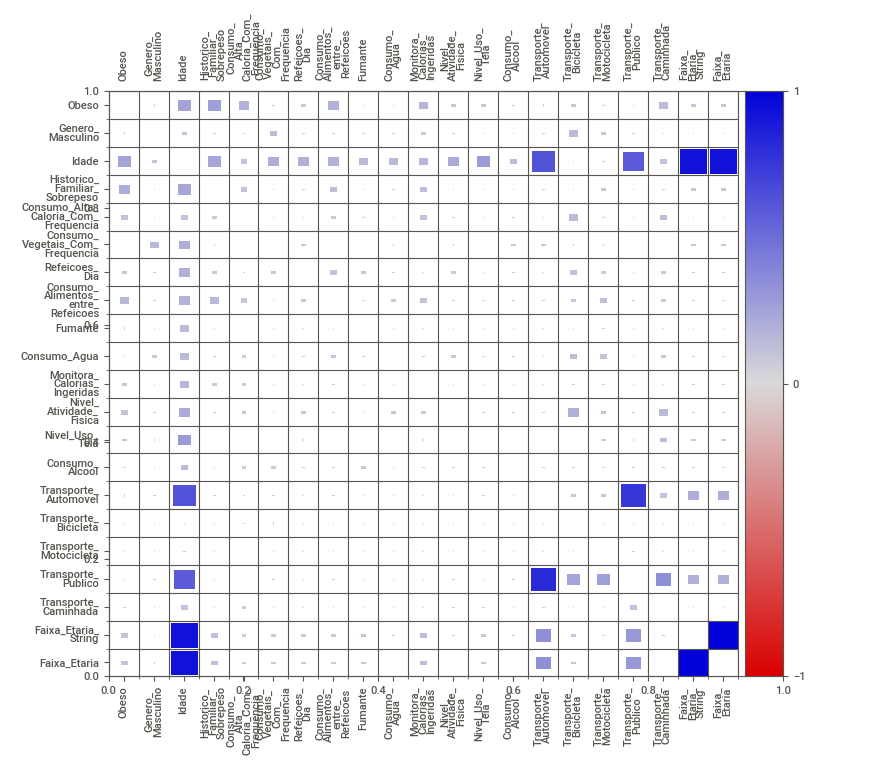
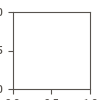

In [24]:
#Mostrar o report
sv_obesidade_report.show_notebook()

### Treinamento do Modelo - Baseline

In [25]:
#Dividir dados de treino e teste
X = df_obesidade.drop(columns=['Obeso', 'Idade', 'Faixa_Etaria_String'], axis=1)
y = df_obesidade['Obeso']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51, shuffle=True)

In [26]:
#Treinamento do modelo
model_baseline = GaussianNB()
model_baseline.fit(X_train, y_train)

GaussianNB()

### Métricas do Modelo Baseline

In [27]:
#Predição de valores do conjunto de testes
y_pred = model_baseline.predict(X_test)

In [28]:
#Avaliação do desempenho do modelo
classification_report_str = classification_report(y_test, y_pred)
recall_baseline = recall_score(y_test, y_pred, average='macro')
print(f'Relatório de Classificação:\n{classification_report_str}')
print(f'Recall:\n{recall_baseline}')

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.60      0.73       339
           1       0.67      0.96      0.79       295

    accuracy                           0.76       634
   macro avg       0.81      0.78      0.76       634
weighted avg       0.82      0.76      0.76       634

Recall:
0.775901204939753


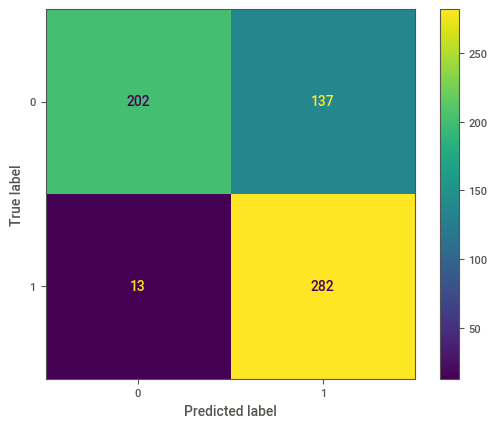

In [29]:
#Mostrar Matriz de confusão
confusion_matrix_modelo_baseline = confusion_matrix(y_test, y_pred)
disp_modelo_baseline = ConfusionMatrixDisplay(confusion_matrix_modelo_baseline)
disp_modelo_baseline.plot()

### Treinamento Modelo - Automated Feature Selection

In [30]:
#Select Kbest - Seleciona as K melhores features baseado em um teste
kbest = SelectKBest(score_func=chi2, k = 8)

In [31]:
X_train_kbest = kbest.fit_transform(X_train, y_train)

In [32]:
X_train_kbest

array([[0, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 2],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 2],
       [1, 1, 3, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 0, 1]])

In [33]:
#Features Selecionadas
kbest_features = kbest.get_support(indices=True)
X_train_best_features = X_train.iloc[:, kbest_features]
X_train_best_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1477 entries, 301 to 2105
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Historico_Familiar_Sobrepeso         1477 non-null   int64   
 1   Consumo_Alta_Caloria_Com_Frequencia  1477 non-null   int64   
 2   Consumo_Alimentos_entre_Refeicoes    1477 non-null   int64   
 3   Monitora_Calorias_Ingeridas          1477 non-null   int64   
 4   Nivel_Atividade_Fisica               1477 non-null   int64   
 5   Nivel_Uso_Tela                       1477 non-null   int64   
 6   Transporte_Caminhada                 1477 non-null   int64   
 7   Faixa_Etaria                         1477 non-null   category
dtypes: category(1), int64(7)
memory usage: 94.0 KB


In [34]:
#Treinamento do modelo com as melhores features
modelo_kbest = GaussianNB()
modelo_kbest.fit(X_train_best_features, y_train)

GaussianNB()

### Métricas do Modelo Select Kbest

In [35]:
#Filtragem das features nos dados de teste
X_test_kbest = kbest.transform(X_test)
X_test_best_features = X_test.iloc[:, kbest_features]

In [36]:
#Predição de valores do conjunto de teste
y_pred_kbest = modelo_kbest.predict(X_test_best_features)

In [37]:
#Avaliação do desempenho do modelo
classification_report_str = classification_report(y_test, y_pred_kbest)
recall_baseline = recall_score(y_test, y_pred_kbest, average='macro')
print(f'Relatório de Classificação (Kbest):\n{classification_report_str}')
print(f'Recall (KBest):\n{recall_baseline}')

Relatório de Classificação (Kbest):
              precision    recall  f1-score   support

           0       0.94      0.61      0.74       339
           1       0.68      0.95      0.79       295

    accuracy                           0.77       634
   macro avg       0.81      0.78      0.76       634
weighted avg       0.82      0.77      0.76       634

Recall (KBest):
0.780105994700265


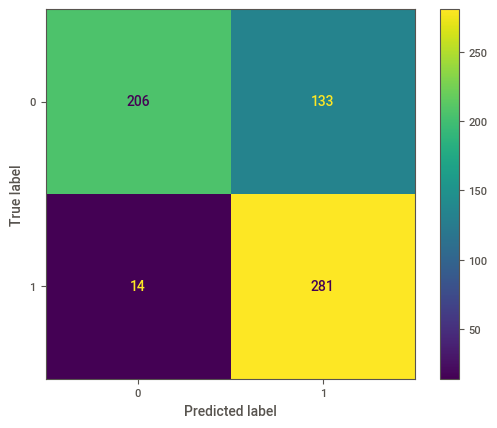

In [38]:
#Mostrar Matriz de confusão
confusion_matrix_modelo_kbest = confusion_matrix(y_test, y_pred_kbest)
disp_modelo_kbest = ConfusionMatrixDisplay(confusion_matrix_modelo_kbest)
disp_modelo_kbest.plot()

### Tuning de Hiperparâmetros

In [39]:
#Ajuste de hiperparametros do SelectKbest
#k = k melhores features conforme chi2

def naivebayes_optuna(trial):
  k=trial.suggest_int('k', 1, 18)

  kbest = SelectKBest(score_func=chi2, k = k)

  X_train_kbest = kbest.fit_transform(X_train, y_train)

  kbest_features = kbest.get_support(indices=True)
  X_train_best_features = X_train.iloc[:, kbest_features]

  #Treinamento do modelo com as melhores features
  model_kbest_optuna = GaussianNB()
  model_kbest_optuna.fit(X_train_best_features, y_train)

  #Aplicação do seletor de features no conjunto de testes
  X_test_kbest = kbest.transform(X_test)
  X_test_best_features = X_test.iloc[:, kbest_features]

  #Predição de valores
  y_pred_kbest = model_kbest_optuna.predict(X_test_best_features)

  #Avaliação de recall
  recall_optuna = recall_score(y_test, y_pred_kbest)

  return k, recall_optuna


In [40]:
#Estudo dos hiperparâmetros
search_space = {'k': range(1,19)}
estudo_naivebayes = optuna.create_study(sampler=optuna.samplers.GridSampler(search_space=search_space), directions=['minimize', 'maximize'])
estudo_naivebayes.optimize(naivebayes_optuna, n_trials=50)

[I 2025-01-10 12:32:32,485] A new study created in memory with name: no-name-941b3831-be87-44d5-8533-af3bb0662484
[I 2025-01-10 12:32:32,621] Trial 0 finished with values: [2.0, 0.7389830508474576] and parameters: {'k': 2}.
[I 2025-01-10 12:32:32,679] Trial 1 finished with values: [7.0, 0.9661016949152542] and parameters: {'k': 7}.
[I 2025-01-10 12:32:32,719] Trial 2 finished with values: [9.0, 0.9525423728813559] and parameters: {'k': 9}.
[I 2025-01-10 12:32:32,780] Trial 3 finished with values: [11.0, 0.9525423728813559] and parameters: {'k': 11}.
[I 2025-01-10 12:32:32,849] Trial 4 finished with values: [15.0, 0.9525423728813559] and parameters: {'k': 15}.
[I 2025-01-10 12:32:32,905] Trial 5 finished with values: [5.0, 0.9593220338983051] and parameters: {'k': 5}.
[I 2025-01-10 12:32:32,952] Trial 6 finished with values: [3.0, 0.9355932203389831] and parameters: {'k': 3}.
[I 2025-01-10 12:32:32,989] Trial 7 finished with values: [17.0, 0.9559322033898305] and parameters: {'k': 17}.


In [41]:
#Mostrar melhor resultado
trial_com_melhor_recall = max(estudo_naivebayes.best_trials, key=lambda t: t.values[1])
print("Trial com maior recall e menor k: ")
print(f"\ttrial number: {trial_com_melhor_recall.number}")
print(f"\tparam (k): {trial_com_melhor_recall.params}")
print(f"\tvalues (k, recall): {trial_com_melhor_recall.values}")

Trial com maior recall e menor k: 
	trial number: 15
	param (k): {'k': 6}
	values (k, recall): [6.0, 0.9694915254237289]


In [42]:
#Mostrar chart com trails
fig = optuna.visualization.plot_pareto_front(estudo_naivebayes)
fig.show()

### Salvar Modelo

In [43]:
import joblib

#Salvar o modelo
joblib.dump(modelo_kbest, 'modelo_obesidade.pkl')

['modelo_obesidade.pkl']